# Vehicle Maintenance Prediction

## Project Planning and Data Exploration

Building a reliable and accurate predictive model that categorizes cars as needing repair or not is the major objective of this project. 

We try to accomplish the following goals:
- __Develop a high-performing classification model:__ We aim for a minimum 90% accuracy on a held-out test set. Utilizing the machine learning algorithms covered in class, such as logistic regression, decision trees, etc. We will determine the most effective model for this prediction task.

- __Identify key features contributing to maintenance prediction:__ We will determine which features have the strongest influence on the model's predictions. This can provide valuable insights into factors affecting vehicle maintenance and inform preventative maintenance strategies.

#### IMPORTING LIBRARIES

In [57]:
import pandas as pd
import numpy as np
from vmpred.constant import *
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

#### DATASET OVERVIEW

In [43]:
df = pd.read_csv('rawData/vehicle_maintenance_data.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vehicle_model         50000 non-null  object 
 1   mileage               50000 non-null  int64  
 2   maintenance_history   50000 non-null  object 
 3   reported_issues       50000 non-null  int64  
 4   vehicle_age           50000 non-null  int64  
 5   fuel_type             50000 non-null  object 
 6   transmission_type     50000 non-null  object 
 7   engine_size           50000 non-null  int64  
 8   odometer_reading      50000 non-null  int64  
 9   last_service_date     50000 non-null  object 
 10  warranty_expiry_date  50000 non-null  object 
 11  owner_type            50000 non-null  object 
 12  insurance_premium     50000 non-null  int64  
 13  service_history       50000 non-null  int64  
 14  accident_history      50000 non-null  int64  
 15  fuel_efficiency    

In [45]:
df.head(10)

,vehicle_model,mileage,maintenance_history,reported_issues,vehicle_age,fuel_type,transmission_type,engine_size,odometer_reading,last_service_date,warranty_expiry_date,owner_type,insurance_premium,service_history,accident_history,fuel_efficiency,tire_condition,brake_condition,battery_status,need_maintenance
0,Truck,58765,Poor,0,4,Diesel,Manual,2000,28524,23-11-2023,24-06-2025,First,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Poor,1,7,Petrol,Manual,2500,133630,21-09-2023,04-06-2025,First,23489,7,0,13.625307,New,New,Weak,1
2,Car,68072,Poor,0,2,Petrol,Manual,1500,34022,27-06-2023,27-04-2025,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Poor,4,5,Petrol,Manual,2500,81636,24-08-2023,05-11-2025,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Automatic,2000,97162,25-05-2023,14-09-2025,First,16446,6,2,16.977483,Good,Good,Weak,1
5,Truck,31653,Poor,2,1,Electric,Automatic,800,70954,12-08-2023,05-09-2024,Second,16813,5,3,15.954422,Worn Out,Good,New,0
6,Truck,51211,Good,2,8,Petrol,Automatic,2500,145563,13-01-2024,20-07-2025,First,21057,10,0,16.455703,New,Good,New,0
7,Van,79093,Poor,2,2,Petrol,Automatic,2000,132354,12-05-2023,13-02-2026,Third,6498,3,1,12.128404,Good,New,New,1
8,SUV,59673,Poor,2,6,Petrol,Automatic,800,85733,07-04-2023,21-04-2025,Second,12787,9,1,11.558027,Worn Out,Good,Weak,1
9,Car,37001,Poor,2,9,Petrol,Automatic,1500,8554,05-08-2023,14-05-2025,Second,20860,9,1,12.787248,Worn Out,New,New,0


In [46]:
print(f"Number of Samples: {df.shape[0]} \nNumber of Attributes: {df.shape[1]}")

Number of Samples: 50000 
Number of Attributes: 20


In [47]:
print("FEATURE COLUMNS:\n","\n".join(colName.title() for colName in df.columns if colName!="Need_Maintenance"))

FEATURE COLUMNS:
 Vehicle_Model
Mileage
Maintenance_History
Reported_Issues
Vehicle_Age
Fuel_Type
Transmission_Type
Engine_Size
Odometer_Reading
Last_Service_Date
Warranty_Expiry_Date
Owner_Type
Insurance_Premium
Service_History
Accident_History
Fuel_Efficiency
Tire_Condition
Brake_Condition
Battery_Status
Need_Maintenance


In [48]:
print("TARGET VARIABLE:", (df.columns.tolist()[-1]))

TARGET VARIABLE: need_maintenance


## Phase 1: DATASET INGESTION

Getting Data from __RootDirectory/rawData__ to __RootDirectory/data/ingestedData__ for further processing.

Refer [dataIngestion.py](vmpred/component/dataIngestion.py) for Data Ingestion Process.

## Phase 2: DATASET VALIDATION

After data ingestion, we validate the ingested dataset against the predefined schema documented during the data gathering phase.

Schema: [schema.yaml](config/schema.yaml)

Data Validation: [dataValidation.py](vmpred/component/dataValidation.py)

After validating the data, we saved it in Parquet format to optimize storage space and enable faster reading.

## Phase 3: DATA TRANSFORMATION
- Step1: Handle Missing Values 
- Step2: Drop Duplicates
- Step3: Feature Engineering [Adding New Features]
- Step4: Applying Feature Scaling for Numerical Features and One-Hot Encoding for Categorical Features
- Step5: Splitting the Data into Train and Test Data with ratio of 75:25 using StratifiedShuffle to eliminate any skewness issues

__[dataTransformation.py](vmpred/component/dataTransformation.py)__

##### List of New Features:
1. __Time Since Last Service (in days)__: ReferenceDate - Last_Service_Date
2. __Warranty Duration (in days)__: Warranty_Expiring_Date - ReferenceDate
3. __Mileage per Year__: Mileage / vehicle_age
4. __Service Frequency__: service_history / vehicle_age
5. __Accident Rate__: accident_history / vehicle_age

In [49]:
trainData = pd.read_parquet('data/transformedData/trainData/train_data.parquet', engine='pyarrow')
testData = pd.read_parquet('data/transformedData/testData/test_data.parquet', engine='pyarrow')

In [50]:
print(trainData.shape)
trainData.head(10)

(35000, 41)


,mileage,reported_issues,vehicle_age,engine_size,odometer_reading,insurance_premium,service_history,accident_history,time_since_last_service,warranty_duration,mileage_per_year,service_frequency,accident_rate,vehicle_model_Bus,vehicle_model_Car,vehicle_model_Motorcycle,vehicle_model_SUV,vehicle_model_Truck,vehicle_model_Van,maintenance_history_1,maintenance_history_2,maintenance_history_3,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual,owner_type_First,owner_type_Second,owner_type_Third,tire_condition_1,tire_condition_2,tire_condition_3,brake_condition_1,brake_condition_2,brake_condition_3,battery_status_1,battery_status_2,battery_status_3,need_maintenance,fuel_efficiency
8364,1.533129,0.879338,-1.214423,-1.204918,-0.115768,1.047117,-0.527175,-0.448022,0.262439,-1.287742,1.435075,0.206088,0.098370,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,10.018969
35463,-1.051276,0.879338,-1.562170,1.503508,0.360795,1.719660,1.559876,1.338492,-0.150199,-0.660332,1.517542,4.533543,4.311432,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,13.917441
49253,-0.923861,-0.876318,-0.171182,-0.089684,-1.422453,1.226812,0.168508,-0.448022,1.510668,-0.467663,-0.501031,-0.226658,-0.407198,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,16.462406
48935,1.379189,1.464556,-0.171182,1.503508,-1.669461,-0.464930,-1.570701,-1.341279,1.335297,1.276238,-0.075477,-0.767590,-0.744243,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,10.346504
27149,-0.329837,-0.876318,-1.214423,1.503508,1.141088,0.321273,-1.570701,0.445235,-0.882630,-0.092206,0.574485,-0.605310,0.940982,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,10.827714
38180,0.533738,1.464556,1.567554,-0.886280,0.187451,0.773004,1.212034,-1.341279,0.355282,-0.255233,-0.633401,-0.388937,-0.744243,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,12.781703
41453,-0.477596,-0.876318,1.567554,0.706912,-0.846720,-0.532212,0.864192,1.338492,0.736972,-1.623677,-0.726837,-0.443031,-0.238675,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,13.091529
18113,-0.021333,0.294119,-0.171182,-0.886280,-0.256690,1.330643,-1.570701,-1.341279,-0.892946,-1.277861,-0.334263,-0.767590,-0.744243,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,18.665814
20353,-0.955107,-1.461536,0.872059,0.706912,-0.374265,1.103739,0.864192,1.338492,-1.501587,-0.368859,-0.704916,-0.334844,-0.112283,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,14.445923
7987,-0.749855,-0.291099,0.176565,1.503508,1.394640,-0.393495,-0.875017,1.338492,1.428140,1.528190,-0.563249,-0.605310,0.098370,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,11.601281


In [51]:
print(testData.shape)
testData.head(10)

(15000, 41)


,mileage,reported_issues,vehicle_age,engine_size,odometer_reading,insurance_premium,service_history,accident_history,time_since_last_service,warranty_duration,mileage_per_year,service_frequency,accident_rate,vehicle_model_Bus,vehicle_model_Car,vehicle_model_Motorcycle,vehicle_model_SUV,vehicle_model_Truck,vehicle_model_Van,maintenance_history_1,maintenance_history_2,maintenance_history_3,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual,owner_type_First,owner_type_Second,owner_type_Third,tire_condition_1,tire_condition_2,tire_condition_3,brake_condition_1,brake_condition_2,brake_condition_3,battery_status_1,battery_status_2,battery_status_3,need_maintenance,fuel_efficiency
38603,1.156856,1.464556,-0.518929,-1.204918,0.367525,-0.495664,-1.222859,-0.448022,1.417824,-0.764077,0.113077,-0.605310,-0.322936,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,13.167464
19319,-0.278038,0.879338,1.219806,-1.204918,1.641347,1.227089,-0.179333,-0.448022,-0.459677,-1.589096,-0.672099,-0.575258,-0.556995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,13.826693
41146,1.356067,-0.291099,0.524312,0.706912,1.030476,-1.025337,0.864192,1.338492,-0.129567,-0.961686,-0.352707,-0.257568,-0.022003,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,16.921351
46300,1.452583,-1.461536,-0.171182,0.706912,-0.036256,0.825889,-0.875017,-0.448022,-0.583468,0.910661,-0.061915,-0.551217,-0.407198,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1,15.169160
44052,1.410922,1.464556,-0.171182,-0.886280,-1.360858,1.143748,-1.570701,-1.341279,-0.903262,1.454087,-0.069613,-0.767590,-0.744243,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,13.933962
26088,-0.630564,-0.291099,-0.171182,-1.204918,1.590358,-0.782790,0.864192,-1.341279,0.582233,0.638949,-0.446836,-0.010285,-0.744243,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,12.217342
46037,0.342442,1.464556,-0.866676,1.503508,1.138047,-1.359671,-1.222859,-0.448022,-0.820735,1.236717,0.244993,-0.515155,-0.182501,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,12.166277
9711,-1.173553,-0.876318,-0.171182,0.706912,1.378789,1.212414,-0.179333,-0.448022,-0.088303,1.701098,-0.547168,-0.334844,-0.407198,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,13.735795
17248,0.749128,0.294119,-1.562170,1.503508,-1.476343,0.966683,1.559876,1.338492,-0.335886,-0.329337,3.180921,4.533543,4.311432,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,14.404511
20876,-1.432757,-0.876318,-0.866676,-0.089684,-1.090850,-1.114355,-0.875017,-0.448022,-0.892946,-1.080252,-0.301704,-0.334844,-0.182501,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,13.936905


## Phase 4: MODEL TRAINING

- Step1: Reading the transformed_trained_data for model training
- Step2: Splitting the data into train and test 75:25
- Step3: Reading the model configurations from [model.yaml](config/model.yaml)
- Step4: Training 5 classifier models specified in the model configuration and saving each model as a pkl file for model evaluation in further steps.

__[modelTrainer.py](vmpred/component/modelTrainer.py)__

In [55]:
# Classifier Models Performance
modelcPerformance = pd.read_csv('data/modelcPerformance/model_performance.csv')
modelcPerformance

,model_name,best_params,accuracy,cross_val_mean_accuracy,cross_val_std,roc_auc,log_loss,confusion_matrix,precision,recall,f1_score,training_time,prediction_time
0,LogisticRegression,"{'C': 10, 'solver': 'liblinear'}",0.929333,0.932367,0.001796,0.977344,0.149677,"[[1613, 369], [373, 8145]]",0.929388,0.929333,0.929361,2.909495,0.007368
1,RandomForestClassifier,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.958095,0.958449,0.004963,0.990363,0.150732,"[[1743, 239], [201, 8317]]",0.957822,0.958095,0.957939,104.313742,0.160054
2,SGDClassifier,"{'alpha': 0.001, 'loss': 'log_loss', 'penalty'...",0.930667,0.931469,0.001556,0.977327,0.150089,"[[1582, 400], [328, 8190]]",0.929808,0.930667,0.930171,1.867987,0.007000
3,DecisionTreeClassifier,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958286,0.958571,0.005060,0.990797,0.088404,"[[1745, 237], [201, 8317]]",0.958027,0.958286,0.958139,5.616516,0.008599
4,XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.958286,0.958612,0.005063,0.991486,0.086203,"[[1745, 237], [201, 8317]]",0.958027,0.958286,0.958139,16.928845,0.084690


In [56]:
# Regressor Models Performance
modelrPerformance = pd.read_csv('data/modelrPerformance/model_performance.csv')
modelrPerformance

,model_name,best_params,rmse,mae,r2,cross_val_mean_rmse,cross_val_std_rmse,training_time,prediction_time
0,LinearRegression,"{'fit_intercept': True, 'positive': False}",1.699049,2.500756,-0.000804,2.874505,0.010563,3.108814,0.004511
1,Ridge,"{'alpha': 10.0, 'max_iter': 1000, 'solver': 'a...",1.698995,2.500581,-0.000675,2.873478,0.009841,2.183259,0.003000
2,RandomForestRegressor,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",1.699145,2.499573,-0.001030,2.876554,0.009322,192.998278,0.053006
3,GradientBoostingRegressor,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.699403,2.500973,-0.001636,2.874709,0.009948,53.385593,0.007000
4,XGBRegressor,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.699069,2.499718,-0.000851,2.875645,0.009316,3.871457,0.051513


#### VISUALIZING PERFORMANCE

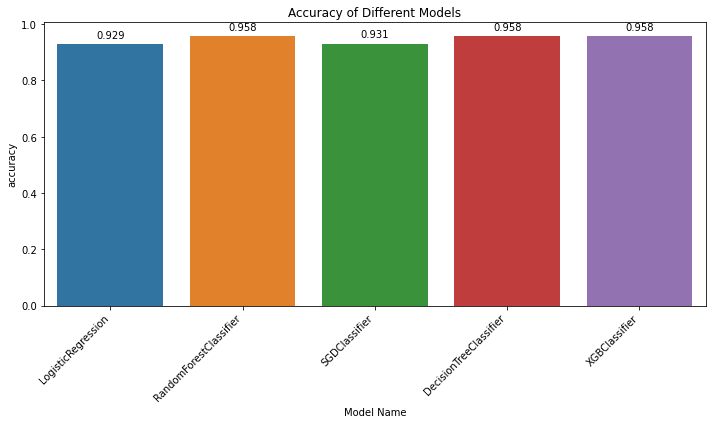

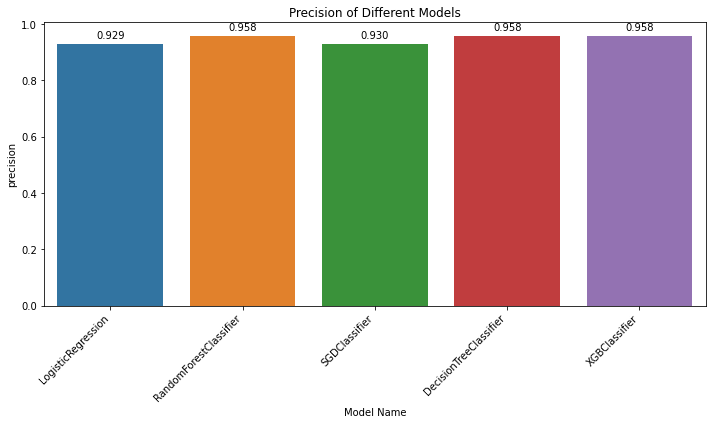

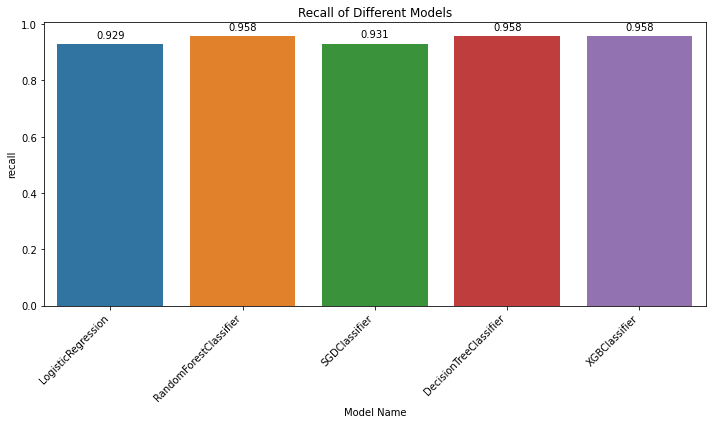

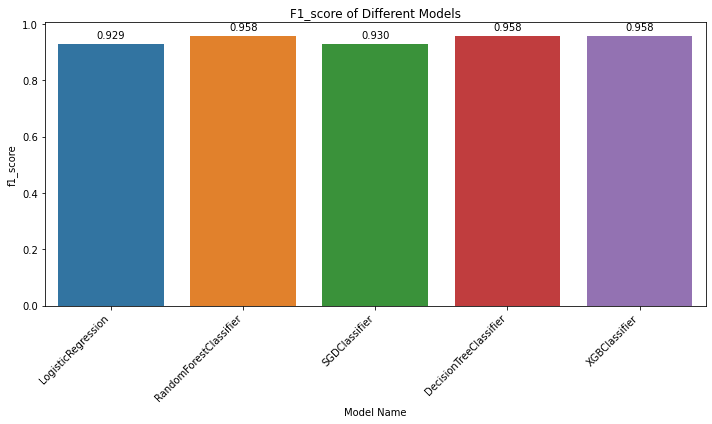

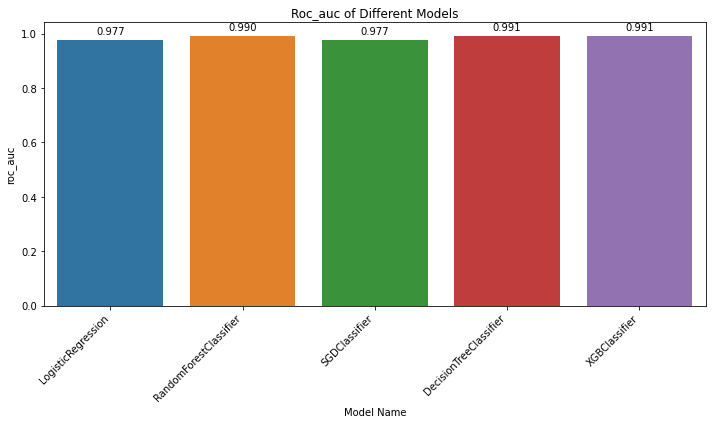

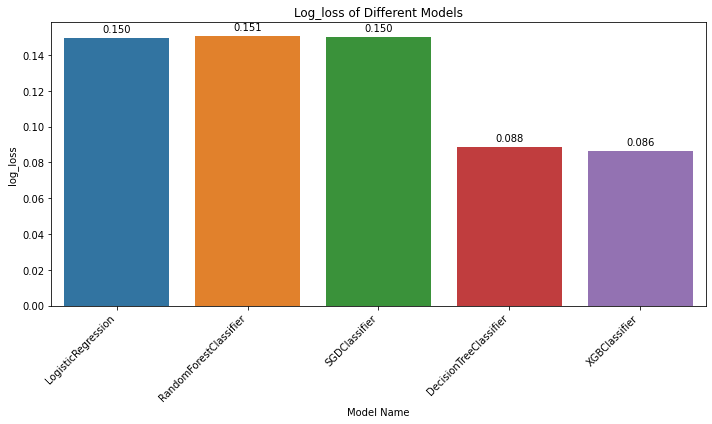

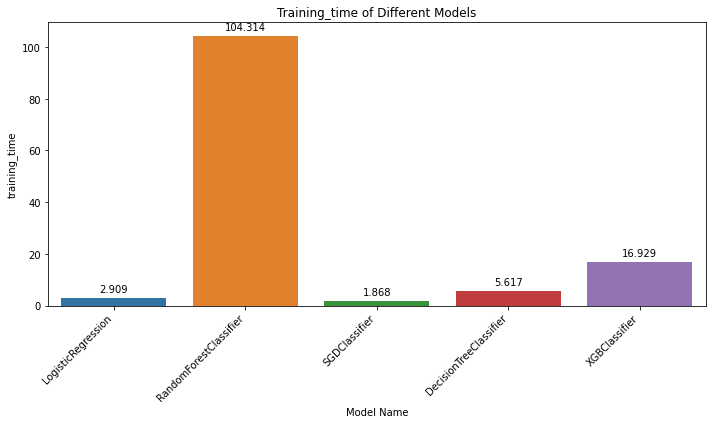

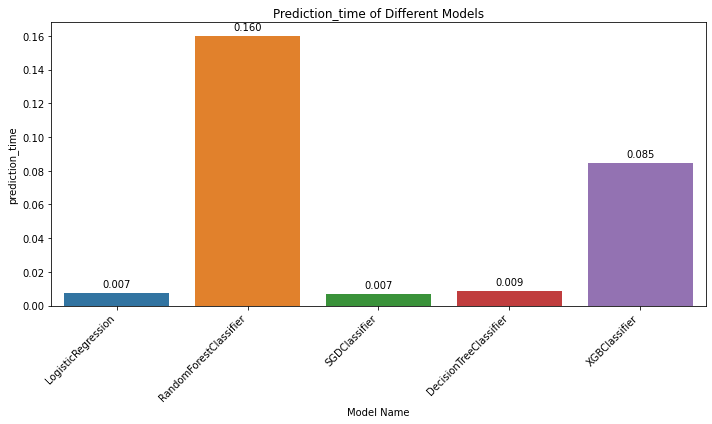

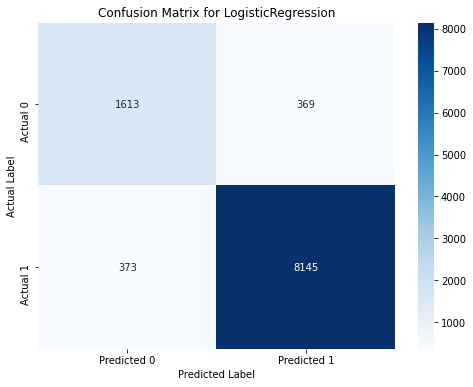

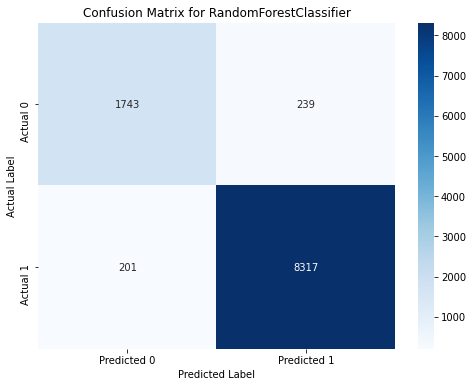

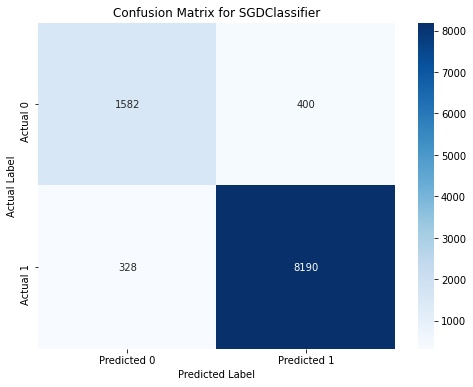

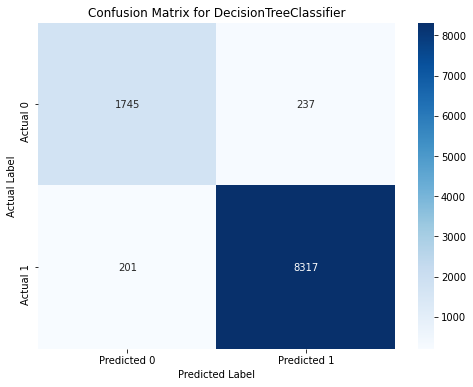

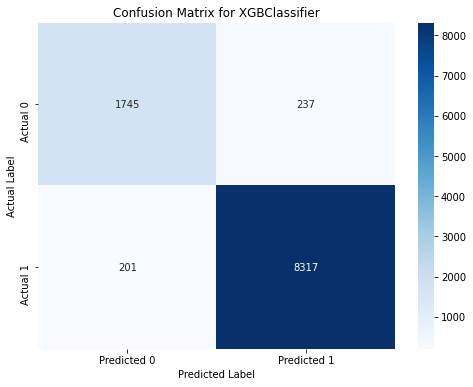

In [60]:
# Classifier Models Performance

# Plotting functions
def plot_metric(df, metric):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='model_name', y=metric, data=df)
    plt.title(f'{metric.capitalize()} of Different Models')
    plt.xlabel('Model Name')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')

    # Add value labels on the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.3f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(df, model_name):
    try:
        model_data = df[df['model_name'] == model_name]
        conf_matrix = np.array(eval(model_data['confusion_matrix'].iloc[0]))
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Predicted 0', 'Predicted 1'], 
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('Actual Label')
        plt.show()
    except (KeyError, IndexError) as e:
        print(f"Error plotting confusion matrix for {model_name}: {e}")


# Create plots for various metrics
plot_metric(modelcPerformance, 'accuracy')
plot_metric(modelcPerformance, 'precision')
plot_metric(modelcPerformance, 'recall')
plot_metric(modelcPerformance, 'f1_score')
plot_metric(modelcPerformance, 'roc_auc')
plot_metric(modelcPerformance, 'log_loss')
plot_metric(modelcPerformance, 'training_time')
plot_metric(modelcPerformance, 'prediction_time')

#Plot Confusion matrices for each model
for model_name in modelcPerformance['model_name'].unique():
    plot_confusion_matrix(modelcPerformance, model_name)

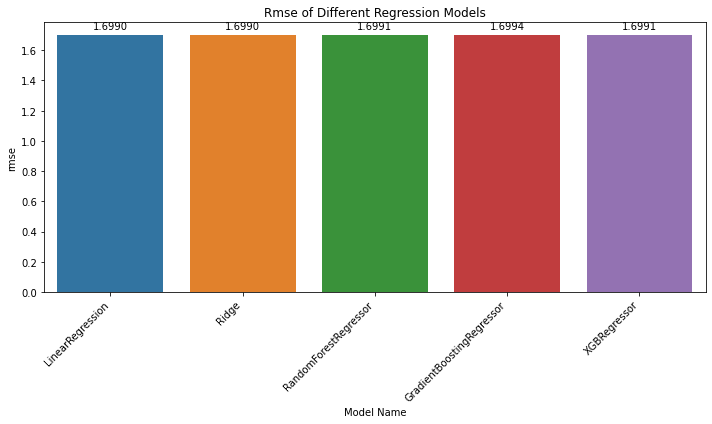

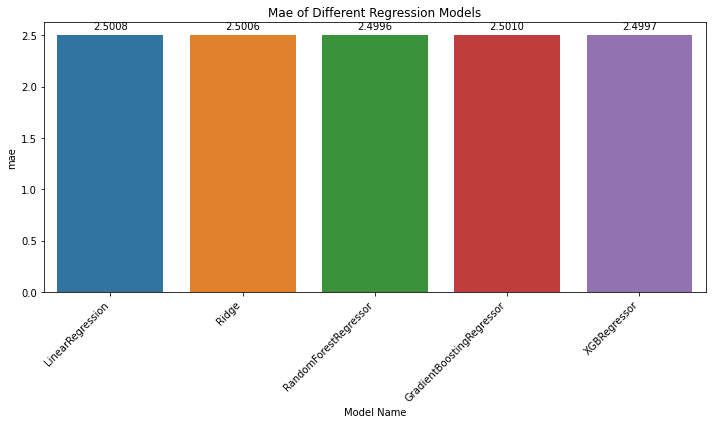

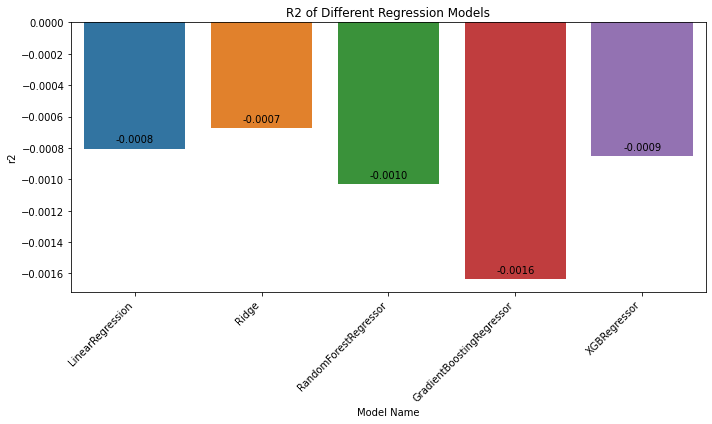

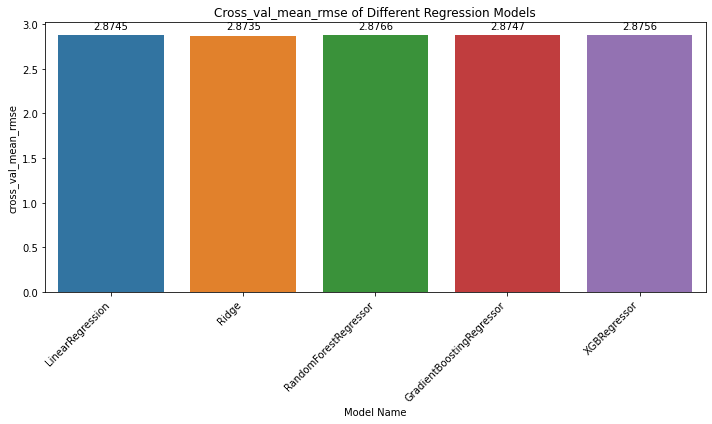

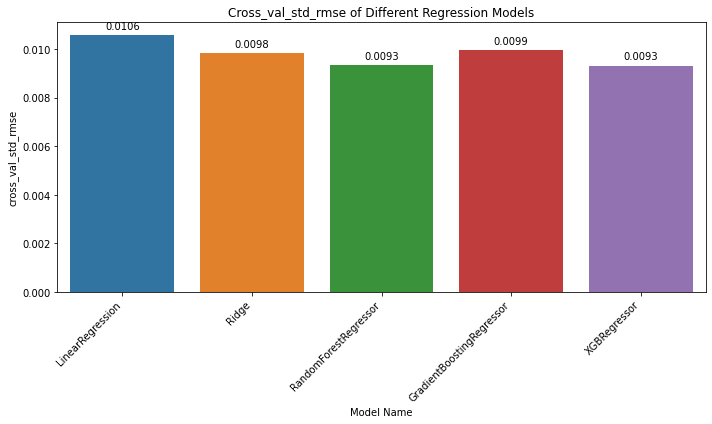

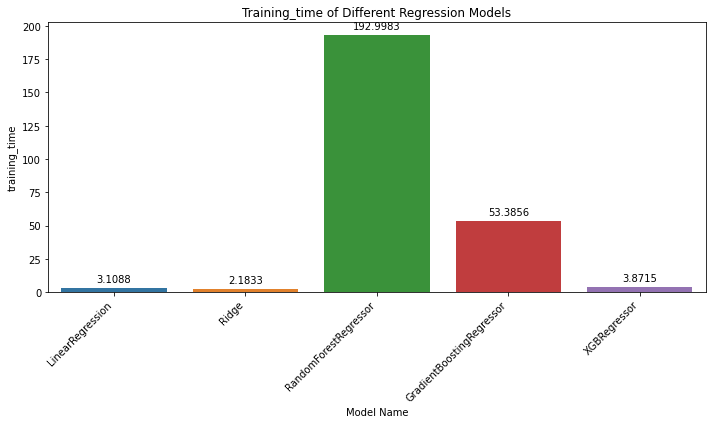

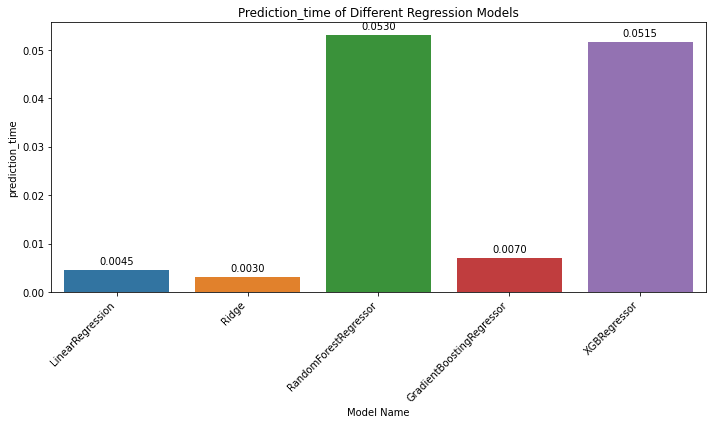

In [62]:
# Regressor Models Performance

def plot_regression_metric(df, metric):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='model_name', y=metric, data=df)
    plt.title(f'{metric.capitalize()} of Different Regression Models')
    plt.xlabel('Model Name')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')

    # Add value labels on the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.4f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()


# Create plots for various regression metrics
plot_regression_metric(modelrPerformance, 'rmse')
plot_regression_metric(modelrPerformance, 'mae')
plot_regression_metric(modelrPerformance, 'r2')
plot_regression_metric(modelrPerformance, 'cross_val_mean_rmse')
plot_regression_metric(modelrPerformance, 'cross_val_std_rmse')
plot_regression_metric(modelrPerformance, 'training_time')
plot_regression_metric(modelrPerformance, 'prediction_time')

## Phase 5: MODEL EVALUATION

In [63]:
validationData = pd.read_parquet('data/transformedData/testData/test_data.parquet', engine='pyarrow')

In [67]:
TARGET_VARIABLE

'need_maintenance'

In [64]:
X = validationData.drop(columns=TARGET_VARIABLE, axis=1)
y = validationData[[TARGET_VARIABLE[0], TARGET_VARIABLE[1]]]

KeyError: "None of [Index(['n', 'e'], dtype='object')] are in the [columns]"

In [36]:
# Load Trained Model
model_file_path = "model/trainedModel"

model_files = [f for f in os.listdir(model_file_path) if f.endswith(".pkl")]
print(model_files)

models = {}

for i, model_file in enumerate(model_files, start=1):
    with open(os.path.join(model_file_path, model_file), "rb") as file:
        models[f"model_{i}"] = pickle.load(file)

# Access models dynamically by name
DT = models["model_1"]
LR = models["model_2"]
RF = models["model_3"]
SVC = models["model_4"]
XGB = models["model_5"] 

['DecisionTreeClassifier.pkl', 'LogisticRegression.pkl', 'RandomForestClassifier.pkl', 'SGDClassifier.pkl', 'XGBClassifier.pkl']


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred_DT = DT.predict(X)
accuracy_DT = accuracy_score(y, y_pred_DT)
print("\nAccuracy of Decision Tree classifier on test set:", accuracy_DT)


Accuracy of Decision Tree classifier on test set: 0.9592666666666667


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred_LR = LR.predict(X)
accuracy_LR = accuracy_score(y, y_pred_LR)
print("\nAccuracy of LR Classifier on test set:", accuracy_LR)


Accuracy of LR Classifier on test set: 0.9315333333333333


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred_RF = RF.predict(X)
accuracy_RF = accuracy_score(y, y_pred_RF)
print("\nAccuracy of RF Classifier on test set:", accuracy_RF)


Accuracy of RF Classifier on test set: 0.9594


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred_SVC = SVC.predict(X)
accuracy_SVC = accuracy_score(y, y_pred_SVC)
print("\nAccuracy of SGDClassifier on test set:", accuracy_SVC)


Accuracy of SGDClassifier on test set: 0.9302


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred_XGB = XGB.predict(X)
accuracy_XGB = accuracy_score(y, y_pred_XGB)
print("\nAccuracy of XGBClassifier on test set:", accuracy_XGB)


Accuracy of XGBClassifier on test set: 0.9592666666666667
